<a href="https://colab.research.google.com/github/SathyaSudha-96/HeatFlux/blob/main/HeatFlux_KerasRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/HeatFlux/Input.csv')
df.head()

,Position,0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,0.185,0.19,...,4.8,4.805,4.81,4.815,4.82,4.825,4.83,4.835,4.84,4.845,4.85,4.855,4.86,4.865,4.87,4.875,4.88,4.885,4.89,4.895,4.9,4.905,4.91,4.915,4.92,4.925,4.93,4.935,4.94,4.945,4.95,4.955,4.96,4.965,4.97,4.975,4.98,4.985,4.99,4.995
0,0.00,518.158288,518.159996,518.161673,518.163317,518.164928,518.166505,518.168048,518.169556,518.171029,518.172465,518.173865,518.175228,518.176553,518.177840,518.179090,518.180303,518.181478,518.182616,518.183719,518.184785,518.185815,518.186810,518.187769,518.188693,518.189582,518.190436,518.191254,518.192036,518.192783,518.193493,518.194168,518.194807,518.195411,518.195978,518.196511,518.197008,518.197472,518.197901,518.198297,...,510.093428,510.081489,510.069615,510.057800,510.046036,510.034317,510.022636,510.010985,509.999357,509.987744,509.976139,509.964535,509.952924,509.941299,509.929652,509.917977,509.906266,509.894511,509.882708,509.870853,509.858941,509.846974,509.834949,509.822868,509.810735,509.798552,509.786322,509.774052,509.761746,509.749410,509.737049,509.724669,509.712274,509.699871,509.687462,509.675052,509.662645,509.650242,509.637845,509.625453
1,0.95,518.541005,518.543565,518.546091,518.548584,518.551042,518.553466,518.555854,518.558206,518.560521,518.562799,518.565040,518.567242,518.569406,518.571531,518.573618,518.575667,518.577677,518.579650,518.581585,518.583483,518.585345,518.587169,518.588958,518.590710,518.592426,518.594106,518.595749,518.597356,518.598926,518.600459,518.601956,518.603416,518.604839,518.606225,518.607575,518.608889,518.610167,518.611410,518.612618,...,510.424164,510.412297,510.400487,510.388731,510.377021,510.365351,510.353716,510.342108,510.330522,510.318951,510.307388,510.295827,510.284262,510.272687,510.261094,510.249477,510.237831,510.226148,510.214425,510.202656,510.190841,510.178977,510.167066,510.155107,510.143104,510.131058,510.118974,510.106855,510.094707,510.082534,510.070341,510.058133,510.045914,510.033688,510.021459,510.009232,509.997007,509.984789,509.972578,509.960373
2,1.90,518.912601,518.915998,518.919359,518.922686,518.925976,518.929231,518.932449,518.935630,518.938773,518.941878,518.944945,518.947972,518.950960,518.953909,518.956819,518.959689,518.962520,518.965313,518.968067,518.970783,518.973461,518.976102,518.978706,518.981273,518.983803,518.986295,518.988750,518.991168,518.993548,518.995891,518.998196,519.000464,519.002693,519.004885,519.007040,519.009158,519.011238,519.013282,519.015289,...,510.747254,510.735458,510.723714,510.712017,510.700361,510.688741,510.677153,510.665591,510.654048,510.642520,510.631002,510.619487,510.607971,510.596447,510.584910,510.573355,510.561776,510.550168,510.538526,510.526847,510.515130,510.503373,510.491577,510.479742,510.467870,510.455964,510.444027,510.432063,510.420075,510.408067,510.396045,510.384011,510.371970,510.359925,510.347880,510.335838,510.323801,510.311772,510.299750,510.287737
3,2.85,519.273289,519.277522,519.281719,519.285880,519.290004,519.294091,519.298140,519.302151,519.306123,519.310056,519.313950,519.317804,519.321618,519.325391,519.329125,519.332819,519.336472,519.340086,519.343662,519.347198,519.350695,519.354154,519.357576,519.360959,519.364305,519.367612,519.370882,519.374113,519.377306,519.380461,519.383577,519.386655,519.389694,519.392695,519.395657,519.398580,519.401466,519.404314,519.407124,...,511.063933,511.052209,511.040531,511.028893,511.017292,511.005725,510.994185,510.982669,510.971172,510.959690,510.948217,510.936751,510.925285,510.913815,510.902336,510.890845,510.879335,510.867803,510.856244,510.844657,510.833040,510.821392,510.809712,510.798003,510.786265,510.774501,510.762713,510.750904,510.739079,510.727239,510.715389,510.703532,510.691672,510.679812,510.667954,510.656101,510.644256,510.632420,510.620594,510.608778
4,3.80,519.624387,519.629473,519.63452

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/HeatFlux/Output.csv')
df2.head()

,position,0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1,0.105,0.11,0.115,0.12,0.125,0.13,0.135,0.14,0.145,0.15,0.155,0.16,0.165,0.17,0.175,0.18,0.185,0.19,...,4.8,4.805,4.81,4.815,4.82,4.825,4.83,4.835,4.84,4.845,4.85,4.855,4.86,4.865,4.87,4.875,4.88,4.885,4.89,4.895,4.9,4.905,4.91,4.915,4.92,4.925,4.93,4.935,4.94,4.945,4.95,4.955,4.96,4.965,4.97,4.975,4.98,4.985,4.99,4.995
0,0.00,15473.49742,13359.62959,12649.48533,12654.56257,13943.51452,17302.07039,22997.33417,31260.64895,41343.89854,52401.69687,64593.91251,77593.58871,90313.21510,101937.0515,112370.5286,122003.9973,131355.8951,140829.2149,150602.5723,160619.1021,170640.5222,180328.6661,189330.7014,197347.7335,204174.8839,209713.0394,213959.4362,216986.4943,218917.7382,219905.6002,220114.1029,219708.2982,218845.3871,217671.0487,216317.3896,214902.0548,213528.5135,212286.6997,211252.2056,...,533732.5071,534265.1759,534798.9811,535333.7146,535869.1546,536405.0750,536941.2450,537477.4301,538013.3971,538548.9143,539083.7519,539617.6828,540150.4799,540681.9150,541211.7628,541739.8021,542265.8127,542789.5859,543310.9553,543829.8006,544346.0458,544859.6564,545370.6376,545879.0327,546384.9193,546888.3997,547389.5997,547888.6665,548385.7646,548881.0627,549374.7273,549866.9167,550357.7840,550847.4761,551336.1250,551823.8434,552310.7248,552796.8358,553282.2116,553766.8434
1,0.95,13742.31730,11956.20790,11673.55457,12441.40119,14648.21900,18803.88356,25331.38031,34193.06054,44626.19640,56299.22688,69058.12263,82113.41458,94531.41813,105924.4463,116456.1561,126534.2101,136540.5499,146683.1053,156956.6076,167174.3234,177040.8633,186231.4290,194459.8217,201522.7126,207316.2211,211830.5137,215131.6166,217338.4487,218601.3778,219084.5185,218953.1416,218366.8499,217473.4600,216407.0726,215286.9179,214216.8633,213285.8718,212568.4690,212123.9046,...,561079.4800,561617.0591,562155.4180,562694.3780,563233.7489,563773.3371,564312.9449,564852.3716,565391.4178,565929.8848,566467.5764,567004.2976,567539.8543,568074.0514,568606.6959,569137.5977,569666.5676,570193.4267,570718.0334,571240.2862,571760.1216,572277.5121,572792.4644,573305.0174,573815.2388,574323.2181,574829.0651,575332.9071,575834.8854,576335.1444,576833.8271,577331.0696,577827.0029,578321.7537,578815.4356,579308.1464,579799.9677,580290.9585,580781.1511,581270.5408
2,1.90,14652.22677,12778.93893,12583.35625,13645.15992,16323.40920,21089.05698,28248.43688,37551.18405,48475.15233,60728.23451,73751.48253,86672.42156,98878.24740,110276.9666,121113.6550,131706.8455,142270.3925,152840.2319,163283.1324,173350.2892,182750.6821,191215.7377,198545.5063,204630.9476,209453.6604,213071.0258,215595.4039,217173.0243,217966.5243,218141.5504,217858.0110,217265.8370,216500.7366,215683.2351,214917.9706,214293.3358,213882.0649,213741.5209,213912.9863,...,594890.2056,595437.7358,595985.7344,596534.0487,597082.5169,597630.9747,598179.2538,598727.1833,599274.5933,599821.3148,600367.1802,600912.0231,601455.6780,601997.9785,602538.7597,603077.8583,603615.1120,604150.3676,604683.5045,605214.4375,605743.1138,606269.5118,606793.6392,607315.5310,607835.2460,608352.8626,608868.4765,609382.1976,609894.1467,610404.4470,610913.2213,611420.5864,611926.6550,612431.5359,612935.3272,613438.1138,613939.9676,614440.9408,614941.0634,615440.3344
3,2.85,17062.94345,14877.04259,14613.96471,15788.09611,18781.16277,24022.62495,31673.03537,41445.25253,52898.29062,65537.91942,78607.54714,91391.73124,103556.24780,115143.3614,126361.6833,137396.6028,148307.9124,159008.7883,169300.4578,178929.5544,187650.3578,195270.3867,201676.4634,206840.6858,210810.1687,213688.5435,215616.1561,216752.3196,217261.8362,217305.1457,217032.4500,216581.1231,216072.7047,215612.4107,215288.6849,215172.8883,215320.0623,215769.1611,216542.6580,...,634771.7899,635333.9705,635896.3368,636458.7607,637021.1064,637583.2362,638145.0091,638706.2814,639266.9104,639826.7535,640385.6697,640943.5181,641500.1591,642055.4525,642609.2581,643161.4375,643711.85

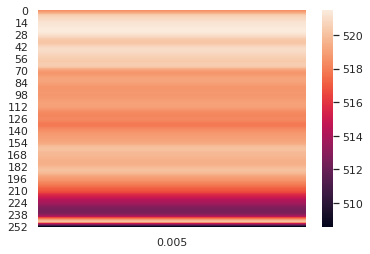

In [5]:
import seaborn as sns; sns.set_theme()
uniform_data = df[['0.005']]
ax = sns.heatmap(uniform_data)

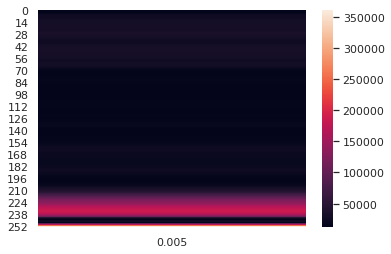

In [6]:
uniform_data = df2[['0.005']]
ax = sns.heatmap(uniform_data)

In [7]:
input = df.transpose()
input.columns = input.iloc[0]
input = input.drop(['Position'])
d = input.index
#input['Time'] = d
#X = input.transpose()
#X.head()
input.head()

Position,0.00,0.95,1.90,2.85,3.80,4.75,5.70,6.65,7.60,8.55,9.50,10.45,11.40,12.35,13.30,14.25,15.20,16.15,17.10,18.05,19.00,19.95,20.90,21.85,22.80,23.75,24.70,25.65,26.60,27.55,28.50,29.45,30.40,31.35,32.30,33.25,34.20,35.15,36.10,37.05,...,203.30,204.25,205.20,206.15,207.10,208.05,209.00,209.95,210.90,211.85,212.80,213.75,214.70,215.65,216.60,217.55,218.50,219.45,220.40,221.35,222.30,223.25,224.20,225.15,226.10,227.05,228.00,228.95,229.90,230.85,231.80,232.75,233.70,234.65,235.60,236.55,237.50,238.45,239.40,240.35
0,518.158288,518.541005,518.912601,519.273289,519.624387,519.968933,520.296969,520.490025,520.631509,520.739641,520.830252,520.914258,520.997211,521.080144,521.159668,521.228322,521.278805,521.309660,521.328707,521.348140,521.375585,521.411316,521.449396,521.478969,521.489221,521.471608,521.423931,521.350699,521.255501,521.138643,521.002126,520.855432,520.711207,520.574934,520.445709,520.325606,520.228488,520.174522,520.174980,520.227167,...,516.235357,515.980052,515.705583,515.428963,515.164301,514.914990,514.682815,514.476287,514.304371,514.161372,514.026182,513.878511,513.711894,513.532823,513.348952,513.164932,512.987928,512.828725,512.696673,512.596235,512.531054,512.510913,512.553682,512.683529,512.931302,513.333877,513.926057,514.725426,515.722833,516.880769,518.127001,519.337014,520.299155,520.714378,519.416836,517.763557,516.054162,514.246572,512.294751,510.166490
0.005,518.159996,518.543565,518.915998,519.277522,519.629473,519.974889,520.303722,520.497541,520.639681,520.748277,520.839090,520.923011,521.005626,521.088056,521.167053,521.235311,521.285672,521.316749,521.336279,521.356236,521.384012,521.419741,521.457510,521.486631,521.496474,521.478623,521.430954,521.358006,521.263380,521.147373,521.011909,520.866311,520.723095,520.587734,520.459405,520.340229,520.243970,520.190562,520.191093,520.242824,...,516.247722,515.992714,515.718751,515.442773,515.178791,514.930123,514.698423,514.491974,514.319528,514.175371,514.038581,513.889085,513.720531,513.539421,513.353393,513.167059,512.987419,512.824966,512.688696,512.582719,512.510286,512.480672,512.511081,512.624848,512.851755,513.227331,513.784795,514.540030,515.482177,516.572050,517.735911,518.848247,519.697462,519.985938,518.542251,516.741590,514.883904,512.926854,510.824425,508.544539
0.01,518.161673,518.546091,518.919359,519.281719,519.634522,519.980806,520.310434,520.505015,520.647811,520.756872,520.847888,520.931728,521.014009,521.095941,521.174415,521.242281,521.292522,521.323825,521.343836,521.364316,521.392420,521.428145,521.465602,521.494271,521.503706,521.485618,521.437957,521.365292,521.271237,521.156082,521.021668,520.877164,520.734953,520.600501,520.473062,520.354809,520.259401,520.206547,520.207145,520.258421,...,516.260056,516.005341,515.731882,515.456544,515.193238,514.945209,514.713981,514.507610,514.334634,514.189320,514.050932,513.899611,513.729123,513.545974,513.357789,513.169136,512.986853,512.821137,512.680633,512.569095,512.489383,512.450261,512.468269,512.565907,512.771886,513.120392,513.643054,514.354059,515.240839,516.262538,517.343917,518.358478,519.094690,519.256384,517.666618,515.718659,513.712770,511.606353,509.353417,506.922018
0.015,518.163317,518.548584,518.922686,519.285880,519.639533,519.986684,520.317107,520.512448,520.655898,520.765425,520.856646,520.940409,521.022360,521.103799,521.181754,521.249232,521.299358,521.330886,521.351379,521.372379,521.400808,521.436528,521.473673,521.501889,521.510916,521.492591,521.444939,521.372557,521.279072,521.164767,521.031403,520.887991,520.746781,520.613233,520.486681,520.369343,520.274782,520.222475,520.223137,520.273954,...,516.272356,516.017933,515.744976,515.470274,515.207641,514.960249,514.729490,514.523194,514.349687,514.203217,514.063232,513.910091,513.737670,513.552484,513.362140,513.171164,512.986228,512.817236,512.672482,512.555361,512.468341,512.419678,512.425243,512.506700,512.691691,513.013052,513.500827,514.167504,514.998809,515.952221,516.951007,517.867693,518.490827,

In [8]:
output = df2.transpose()
output = output.drop(['position'])
#output['Time'] = d
output.columns = input.columns 
#Y = output.transpose()
#Y.head()
output.head()

Position,0.00,0.95,1.90,2.85,3.80,4.75,5.70,6.65,7.60,8.55,9.50,10.45,11.40,12.35,13.30,14.25,15.20,16.15,17.10,18.05,19.00,19.95,20.90,21.85,22.80,23.75,24.70,25.65,26.60,27.55,28.50,29.45,30.40,31.35,32.30,33.25,34.20,35.15,36.10,37.05,...,203.30,204.25,205.20,206.15,207.10,208.05,209.00,209.95,210.90,211.85,212.80,213.75,214.70,215.65,216.60,217.55,218.50,219.45,220.40,221.35,222.30,223.25,224.20,225.15,226.10,227.05,228.00,228.95,229.90,230.85,231.80,232.75,233.70,234.65,235.60,236.55,237.50,238.45,239.40,240.35
0,15473.49742,13742.31730,14652.22677,17062.94345,20296.58970,23883.84552,27305.29486,29201.45913,30506.50904,31449.19997,32200.93791,32866.44090,33494.19310,34093.29712,34642.01544,35096.37986,35419.59713,35612.79030,35730.44711,35849.26422,36014.99336,36227.22862,36449.17930,36618.65150,36676.82867,36576.69984,36301.22918,35864.81616,35271.50928,34499.32767,33530.48790,32403.58573,31206.06754,29994.07747,28777.12459,27593.88714,26606.48768,26048.30341,26053.06809,26592.89600,...,58169.46862,65595.45355,73814.81283,82337.68656,90714.18701,98803.11266,106509.6618,113507.6719,119439.2969,124449.9482,129248.0966,134549.4367,140603.1751,147195.2660,154055.9393,161013.0729,167788.8008,173952.3324,179113.6233,183067.6803,185645.4626,186442.6847,184748.5388,179639.1766,170015.2317,154727.5069,133044.9686,105358.0849,73447.91050,40404.73920,15558.76303,17781.41125,27480.77238,31351.75569,18490.65545,20448.30830,63498.58816,121597.8649,194667.3428,284817.8570
0.005,13359.62959,11956.20790,12778.93893,14877.04259,17686.13226,20808.64487,23793.63727,25452.83949,26595.88914,27421.19968,28077.75100,28656.73155,29200.67743,29718.17381,30191.29455,30582.98056,30862.36809,31031.00636,31135.44344,31240.81816,31384.51746,31568.04501,31753.83822,31928.05061,31990.85448,32541.39566,35449.17810,36042.43239,35394.98578,34596.37096,33614.68791,32494.54739,31309.28237,30111.50734,28909.10516,27740.38103,26765.46752,26214.82396,26220.31956,26753.71772,...,57815.47392,65222.26305,73415.30447,81906.97222,90250.65580,98307.66225,105987.7710,112973.4029,118915.2102,123959.7894,128808.8068,134170.0256,140288.8340,146951.4717,153889.1156,160931.3923,167806.8783,174096.2962,179423.4205,183597.1586,186463.4016,187636.3086,186426.8097,181933.7954,173078.6672,158723.0460,138121.2520,111608.6693,80871.91405,48719.66719,20918.14704,14449.19272,21232.76670,24244.22851,13725.11231,44104.38543,100011.44350,169909.2388,255853.7385,361111.8717
0.01,12649.48533,11673.55457,12583.35625,14613.96471,17310.59323,20330.98068,23249.48499,24884.59748,26013.40203,26827.49042,27472.52627,28037.95290,28565.61514,29064.33342,29517.55584,29890.91740,30156.65803,30317.74671,30418.49704,30519.44048,30653.80327,30821.24114,30983.65925,31138.06506,31232.00701,32106.36855,35747.87619,36620.83404,35805.36245,34831.14789,33756.40931,32604.96430,31418.42816,30230.03133,29040.72041,27885.99994,26923.43738,26380.28094,26386.44777,26913.34151,...,57462.92629,64850.59852,73017.45167,81478.08308,89789.13727,97814.40938,105468.2368,112441.5842,118393.5661,123471.9680,128371.6933,133792.6171,139976.3358,146709.4077,153724.0116,160851.5804,167827.1636,174243.0120,179736.7660,184131.3459,187287.7537,188838.8659,188117.8228,184247.1210,176170.5117,162763.3014,143270.1137,117978.3044,88490.48928,57446.75613,28967.21612,14062.52208,15868.47288,17095.06855,22196.65158,73543.08053,140559.64700,222696.5408,322067.2693,448031.2257
0.015,12654.56257,12441.40119,13645.15992,15788.09611,18558.58969,21688.04162,24774.14808,26533.86206,27758.20162,28642.97109,29342.26490,29951.82669,30516.49165,31045.67224,31522.12854,31910.98659,32185.86749,32352.45050,32456.88334,32559.52445,32689.95375,32841.79773,32963.97747,33046.48884,33056.08800,33940.16306,37695.99192,38235.06480,36839.67886,35392.34474,34043.48838,32772.31110,31547.47717,30354.56598,29173.60937,28031.25568,27080.54193,26544.69437,26551.43647,27071.74501,...,57111.82543,64480.45805,72621.25211,81051.01769,89329.63187,97323.35709,104951.06

In [9]:
print(input.shape)
print(output.shape)

(1000, 254)
(1000, 254)


In [10]:
input.info()
output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 4.995
Columns: 254 entries, 0.0 to 240.35
dtypes: float64(254)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 4.995
Columns: 254 entries, 0.0 to 240.35
dtypes: float64(254)
memory usage: 1.9+ MB


In [11]:
#X = df.iloc[:,0:254]
#y = df2.iloc[:,0:254]
X = np.array(input)
Y = np.array(output)

In [12]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_input = scaler.fit_transform(X)
print(scaled_input)

[[0.99505566 0.98885235 0.98026069 ... 1.         1.         1.        ]
 [0.99525486 0.98914734 0.98064669 ... 0.99674265 0.99635184 0.99595422]
 [0.99545034 0.9894385  0.98102874 ... 0.99348336 0.99270199 0.99190701]
 ...
 [0.00289077 0.0028138  0.00273163 ... 0.019074   0.02083812 0.0230166 ]
 [0.00144507 0.00140652 0.00136535 ... 0.0191265  0.02088983 0.02306753]
 [0.         0.         0.         ... 0.01917902 0.02094158 0.02311852]]


In [13]:
# transform data
scaled_output = scaler.fit_transform(Y)
print(scaled_output)

[[5.21885326e-03 3.63197626e-03 3.43177668e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.31236644e-03 4.96233893e-04 3.24426335e-04 ... 7.76247597e-04
  9.84448477e-04 1.22935473e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.62441259e-03
  2.04978022e-03 2.62991964e-03]
 ...
 [9.98207399e-01 9.98280219e-01 9.98342238e-01 ... 9.93153408e-01
  9.92392121e-01 9.91467638e-01]
 [9.99104387e-01 9.99140814e-01 9.99171825e-01 ... 9.93130391e-01
  9.92368996e-01 9.91444331e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.93107194e-01
  9.92345606e-01 9.91420721e-01]]


In [14]:
print(scaled_input.shape)
print(scaled_output.shape)

(1000, 254)
(1000, 254)


In [15]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(scaled_input,scaled_output, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(800, 254)
(800, 254)
(100, 254)
(100, 254)
(100, 254)
(100, 254)


(None, None)

In [16]:
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

In [17]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, Y):
	results = list()
	n_inputs, n_outputs = X.shape[1], Y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = Y[train_ix], Y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		#print('>%.3f' % mae)
		results.append(mae)
	return results

In [18]:
from numpy import mean
from numpy import std
# evaluate model
results = evaluate_model(X_train, y_train)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))

MAE: 0.020 (0.009)


In [19]:
n_inputs, n_outputs = X.shape[1], Y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_train, y_train, verbose=0, epochs=100)
# make a prediction for new data
prediction= model.predict(X_rem)
#print('Predicted: %s' % prediction[0])

In [20]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_rem, prediction)
error

0.013469810877552705